Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


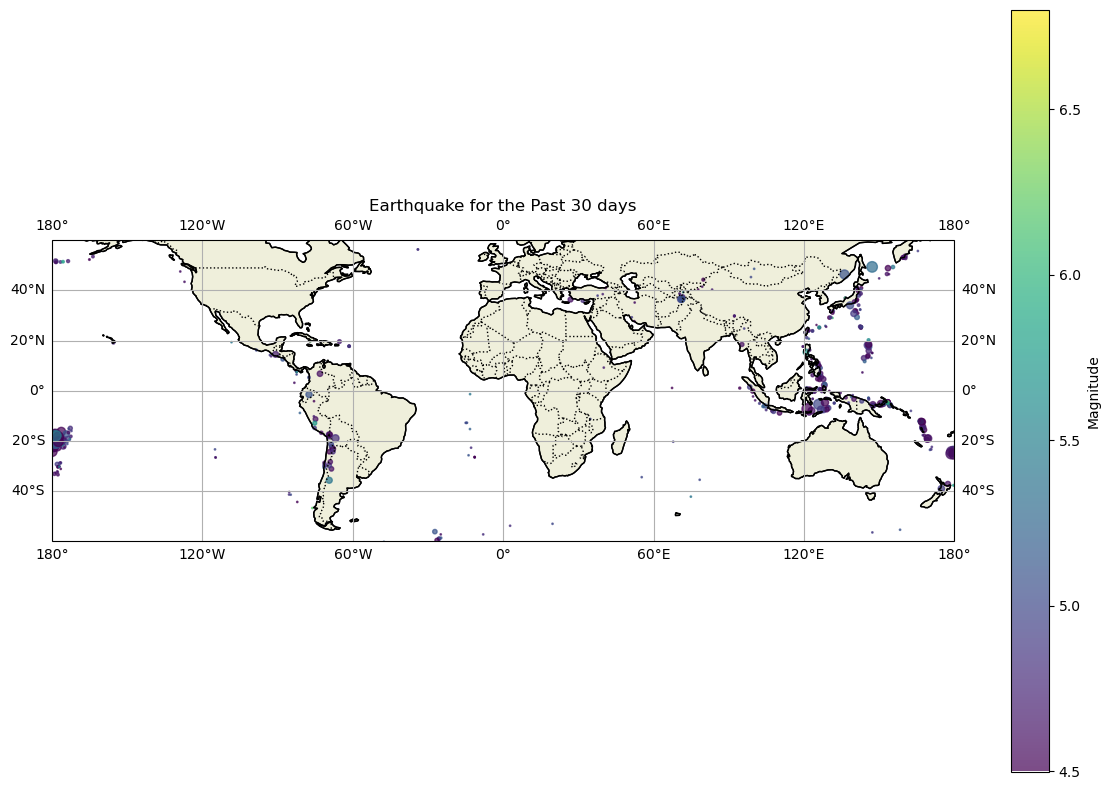

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
import numpy as np

# Load earthquake data (replace 'your_file.csv' with your actual CSV file path)
df = pd.read_csv('30.csv')


print(df.columns) 



# Create a map with PlateCarree projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Add features to the map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_extent([-180, 180, -60, 60], crs=ccrs.PlateCarree())
# Add gridlines and labels
ax.gridlines(draw_labels=True)

# Normalize the magnitude for color mapping
norm = plt.Normalize(vmin=df['mag'].min(), vmax=df['mag'].max())
cmap = cm.viridis

# Create the scatter plot
scatter = ax.scatter(
    df['longitude'], df['latitude'], c=df['mag'], cmap=cmap, 
    marker='o', s=df['depth'] * 0.1, norm=norm, alpha=0.7
)

# Add a color bar for magnitude
plt.colorbar(scatter, ax=ax, label='Magnitude')

# Title
plt.title('Earthquake for the Past 30 days')

# Display the plot
plt.tight_layout()
plt.show()





/tmp/ipykernel_296/612783860.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(max_magnitude_per_bin['lat_min'].astype(str) + "° to " + max_magnitude_per_bin['lat_max'].astype(str) + "°", rotation=90)


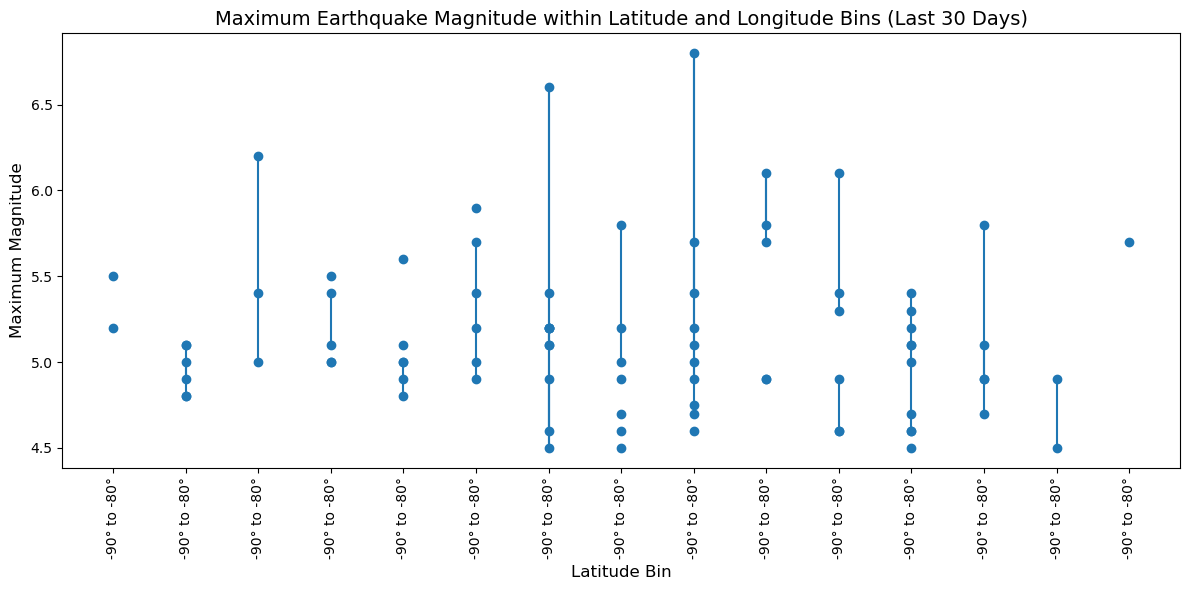

/tmp/ipykernel_296/1437758727.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.concatenate([df_top_10_sorted['lon_min'].astype(str),


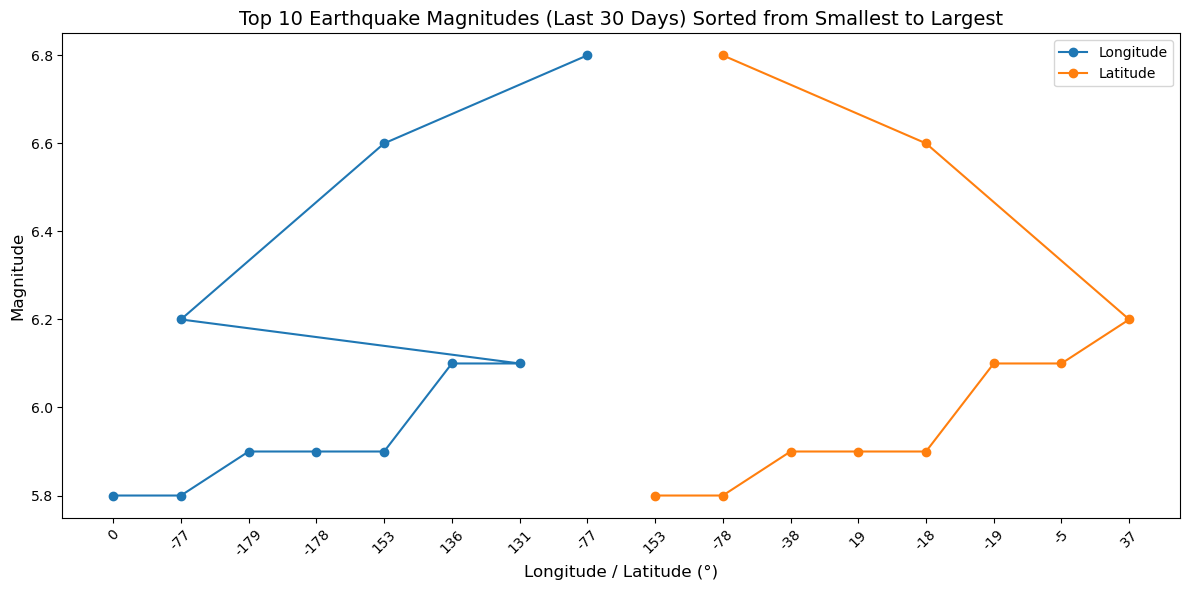

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz

# 读取地震数据
df = pd.read_csv('30.csv')

# 确保 'time' 列是 datetime 格式，并处理时区问题
df['time'] = pd.to_datetime(df['time'], utc=True)  # 将时间列转换为 UTC 时区

# 获取当前时间，并设置时间区间
end_date = datetime.now(pytz.UTC)  # 使用 pytz.UTC 设置当前时区为 UTC
start_date = end_date - timedelta(days=30)

# 筛选过去 30 天内的数据
df_recent = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

# 按震级排序，选择震级排名前10的地震
df_top_10 = df_recent.nlargest(10, 'mag')

# 创建经纬度区间
lat_bins = np.arange(-90, 90, 1)  # 纬度区间，每1度
lon_bins = np.arange(-180, 180, 1)  # 经度区间，每1度

# 对每个经纬度区间，找到震级最大的地震
df_top_10['lat_bin'] = pd.cut(df_top_10['latitude'], bins=lat_bins)
df_top_10['lon_bin'] = pd.cut(df_top_10['longitude'], bins=lon_bins)

# 提取震级排名前10的地震对应的经纬度
df_top_10['lat_min'] = df_top_10['lat_bin'].apply(lambda x: x.left)
df_top_10['lat_max'] = df_top_10['lat_bin'].apply(lambda x: x.right)
df_top_10['lon_min'] = df_top_10['lon_bin'].apply(lambda x: x.left)
df_top_10['lon_max'] = df_top_10['lon_bin'].apply(lambda x: x.right)

# 按震级从小到大排序
df_top_10_sorted = df_top_10.sort_values('mag', ascending=True)

# 填充缺失值，防止 NaN 错误
df_top_10_sorted['lat_min'] = df_top_10_sorted['lat_min'].fillna(0).astype(int)
df_top_10_sorted['lon_min'] = df_top_10_sorted['lon_min'].fillna(0).astype(int)

# 选择震级和经纬度进行绘制
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制震级排名前10的折线图
ax.plot(df_top_10_sorted['lon_min'].astype(str) + "°", 
        df_top_10_sorted['mag'], marker='o', linestyle='-', color='tab:blue', label='Longitude')
ax.plot(df_top_10_sorted['lat_min'].astype(str) + "°", 
        df_top_10_sorted['mag'], marker='o', linestyle='-', color='tab:orange', label='Latitude')

# 设置标题和标签
ax.set_title('Top 10 Earthquake Magnitudes (Last 30 Days) Sorted from Smallest to Largest', fontsize=14)
ax.set_xlabel('Longitude / Latitude (°)', fontsize=12)
ax.set_ylabel('Magnitude', fontsize=12)

# 设置x轴标签并旋转标签，精确到个位数
ax.set_xticklabels(np.concatenate([df_top_10_sorted['lon_min'].astype(str),
                                   df_top_10_sorted['lat_min'].astype(str)]), rotation=45)

# 显示图表
plt.tight_layout()
plt.legend(loc='best')
plt.show()



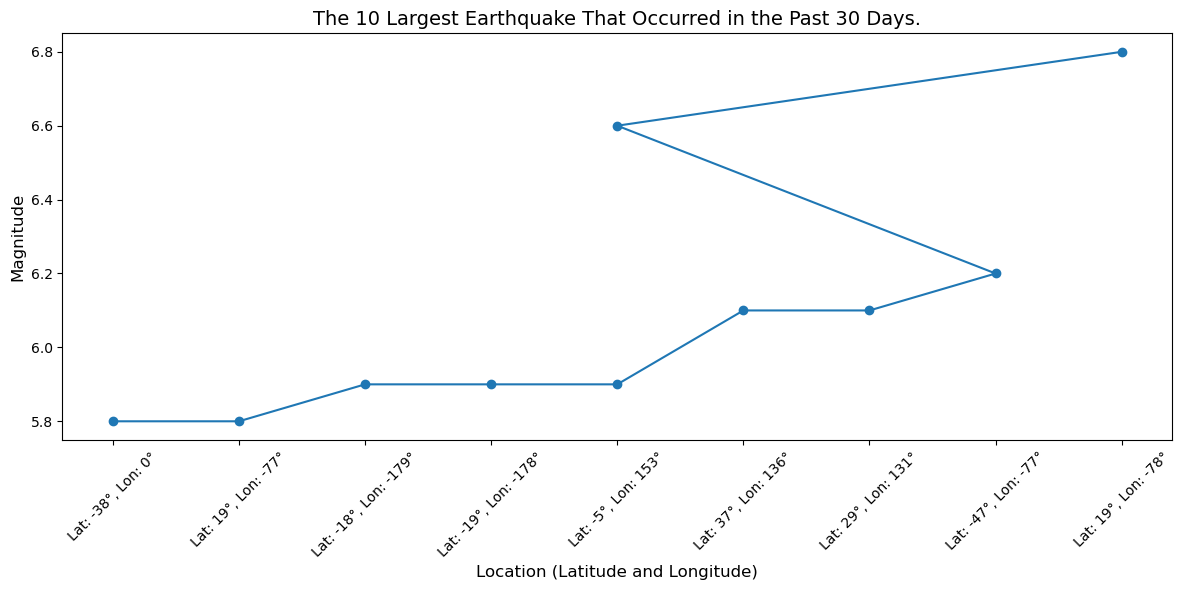

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz

df = pd.read_csv('30.csv')
df['time'] = pd.to_datetime(df['time'], utc=True) 
end_date = datetime.now(pytz.UTC)  
start_date = end_date - timedelta(days=30)
df_recent = df[(df['time'] >= start_date) & (df['time'] <= end_date)]
df_top_10 = df_recent.nlargest(10, 'mag')
lat_bins = np.arange(-90, 90, 1)  
lon_bins = np.arange(-180, 180, 1)  
df_top_10['lat_bin'] = pd.cut(df_top_10['latitude'], bins=lat_bins)
df_top_10['lon_bin'] = pd.cut(df_top_10['longitude'], bins=lon_bins)


df_top_10['lat_min'] = df_top_10['lat_bin'].apply(lambda x: x.left)
df_top_10['lat_max'] = df_top_10['lat_bin'].apply(lambda x: x.right)
df_top_10['lon_min'] = df_top_10['lon_bin'].apply(lambda x: x.left)
df_top_10['lon_max'] = df_top_10['lon_bin'].apply(lambda x: x.right)

# extract the top 10 data.
df_top_10_sorted = df_top_10.sort_values('mag', ascending=True)

df_top_10_sorted['lat_min'] = df_top_10_sorted['lat_min'].fillna(0).astype(int)
df_top_10_sorted['lon_min'] = df_top_10_sorted['lon_min'].fillna(0).astype(int)


df_top_10_sorted['location'] = 'Lat: ' + df_top_10_sorted['lat_min'].astype(str) + '°, Lon: ' + df_top_10_sorted['lon_min'].astype(str) + '°'
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_top_10_sorted['location'], df_top_10_sorted['mag'], marker='o', linestyle='-', color='tab:blue')
ax.set_title('The 10 Largest Earthquake That Occurred in the Past 30 Days.', fontsize=14)
ax.set_xlabel('Location (Latitude and Longitude)', fontsize=12)
ax.set_ylabel('Magnitude', fontsize=12)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()
